In [2]:
import camelot
import pandas as pd
import json
from functools import reduce
import matplotlib.pyplot as plt
#https://matplotlib.org/3.1.0/users/dflt_style_changes.html colors

In [3]:
def get_data(tables):
    data_frames = []
    for i in range(len(tables)):
        data_frames.append(tables[i].df)
    return data_frames

**Lendo os dados pelo pdf**

In [4]:
data_frames = get_data(camelot.read_pdf('../Dados/provided/EDITAL PROECE PROGRAD PROPP AGINOVA No 59, DE 04 DE JUNHO DE 2019.pdf', pages='1-54', flavor='lattice', strip_text='\n'))

In [12]:
df_pdf = reduce(lambda left,right: pd.merge(left,right,on=[0,1,2,3,4],how='outer'), data_frames)
#df_pdf.drop(0, inplace=True)
#df_pdf.rename(columns={
#    0:'Estudante', 1:'Unidade', 2:'Título do Trabalho', 
#    3:'Programa', 4:'Data da apresentação'},inplace=True)

In [461]:
#df_pdf.reset_index().drop('index',axis=1).head()

In [462]:
#GRAVAR OS DADOS OBTIDOS NUM ARQUIVO
#with open('docs/total.json','w', encoding='utf-8') as file: file.write(json.dumps(df_pdf.to_dict(), ensure_ascii=False, indent=4))        
#df_pdf.to_excel('docs/total.xlsx', sheet_name='Sheet1', index=False)

***

In [15]:
df = pd.read_excel('../Dados/generated/integraufms2019.xlsx')

In [464]:
df.head()

,Estudante,Unidade,Título do Trabalho,Programa,Data da apresentação
0,ABEL PEREIRA LIMA SOARES,CPCS,CARACTERÍSTICAS FÍSICAS DO SOLO DESEMPENHO AGR...,PIBIC,25/07/2019
1,ABEL PEREIRA LIMA SOARES,CPCS,DESEMPENHO AGRONÔMICO DE CULTIVARES DE SOJA CO...,PIBIC,26/07/2019
2,ADALGISA APARECIDA DE OLIVEIRA,FAALC,PRÁTICAS DE ESCRITA EM LÍNGUA PORTUGUESA POR A...,PPG,23/07/2019
3,ADÃO CAETANO DE DEUS FILHO,CPAQ,UMA REVISÃO SOBRE O ACENTO NA LÍNGUA TERENA,PIVIC,22/07/2019
4,ADAUTO FERREIRA DE SOUZA NETO,FAENG,ACESSIBILIDADE E INCLUSÃO: TECNOLOGIAS DE MOBI...,PIBIC,26/07/2019


In [465]:
#df.equals(df_pdf.reset_index().drop('index',axis=1))

In [466]:
df.groupby(['Unidade']).groups.keys()

dict_keys(['CPAN', 'CPAQ', 'CPAR', 'CPCS', 'CPCX', 'CPNA', 'CPNV', 'CPPP', 'CPTL', 'ESAN', 'FAALC', 'FAAÇC', 'FACFAN', 'FACH', 'FACOM', 'FADIR', 'FAED', 'FAENG', 'FAMED', 'FAMEZ', 'FAODO', 'INBIO', 'INFI', 'INISA', 'INMA', 'INQUI', 'NHU', 'PROECE'])

In [467]:
len(df.groupby(['Unidade']).groups['CPPP'])

23

In [468]:
df['Programa'].value_counts()

PIBIC        463
PIVIC        200
ENEX         114
PPG           84
PAEXT         71
PET           55
PIBID         39
RP            23
PEG           17
LIGAS         13
CULT          12
EJR            9
ESP            7
PET-SAÚDE      3
Name: Programa, dtype: int64

# **Quantidade de apresentações por campus**

In [469]:
#ordenado = df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Unidade','Estudante']].reset_index().drop('index',axis=1)

In [470]:
trabalhos_submetidos = pd.DataFrame(df['Unidade'].value_counts()).rename(columns={'Unidade':'Quantidade'}) #mesma coisa para obter o resultado acima

In [471]:
trabalhos_submetidos

,Quantidade
CPTL,162
CPAN,95
FAENG,79
FACFAN,72
INISA,66
FAALC,64
FAMEZ,57
CPAQ,57
INBIO,56
CPCS,50


In [472]:
#ordenado

In [473]:
#qtd_unidade = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [474]:
# qtd_unidade.set_index('Unidade',inplace=True)

In [475]:
#qtd_unidade

In [476]:
# qtd_excel.reset_index() voltar para o q era antes

In [477]:
#GRAVA ESSE RESULTADO NUMA PLANILHA
#qtd_unidade.to_excel('docs/qtd_unidade.xlsx')

In [478]:
#https://matplotlib.org/2.0.0/examples/color/named_colors.html
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki','b','teal','#99ff99','#ffcc99', '#52BE80', '#F7DC6F', '#6C3483', 'crimson', 'darkturquoise', '#4A235A', '#F39C12', 'green', 'hotpink', '#800000', '#FFFF00', '#00FF00', '#FF00FF', '#0000FF', '#FF9999', 'red', '#800080', '#CD5C5C', '#E59866', '#1F618D', '#6E2C00', '#17202A', '#85C1E9', '#F1948A']
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki']

In [479]:
#FUNCIONANDO
#unidade_pie = qtd_unidade.plot.pie(y='Quantidade',figsize=(19, 19), shadow=True, autopct='%1.2f%%', colors=colors)

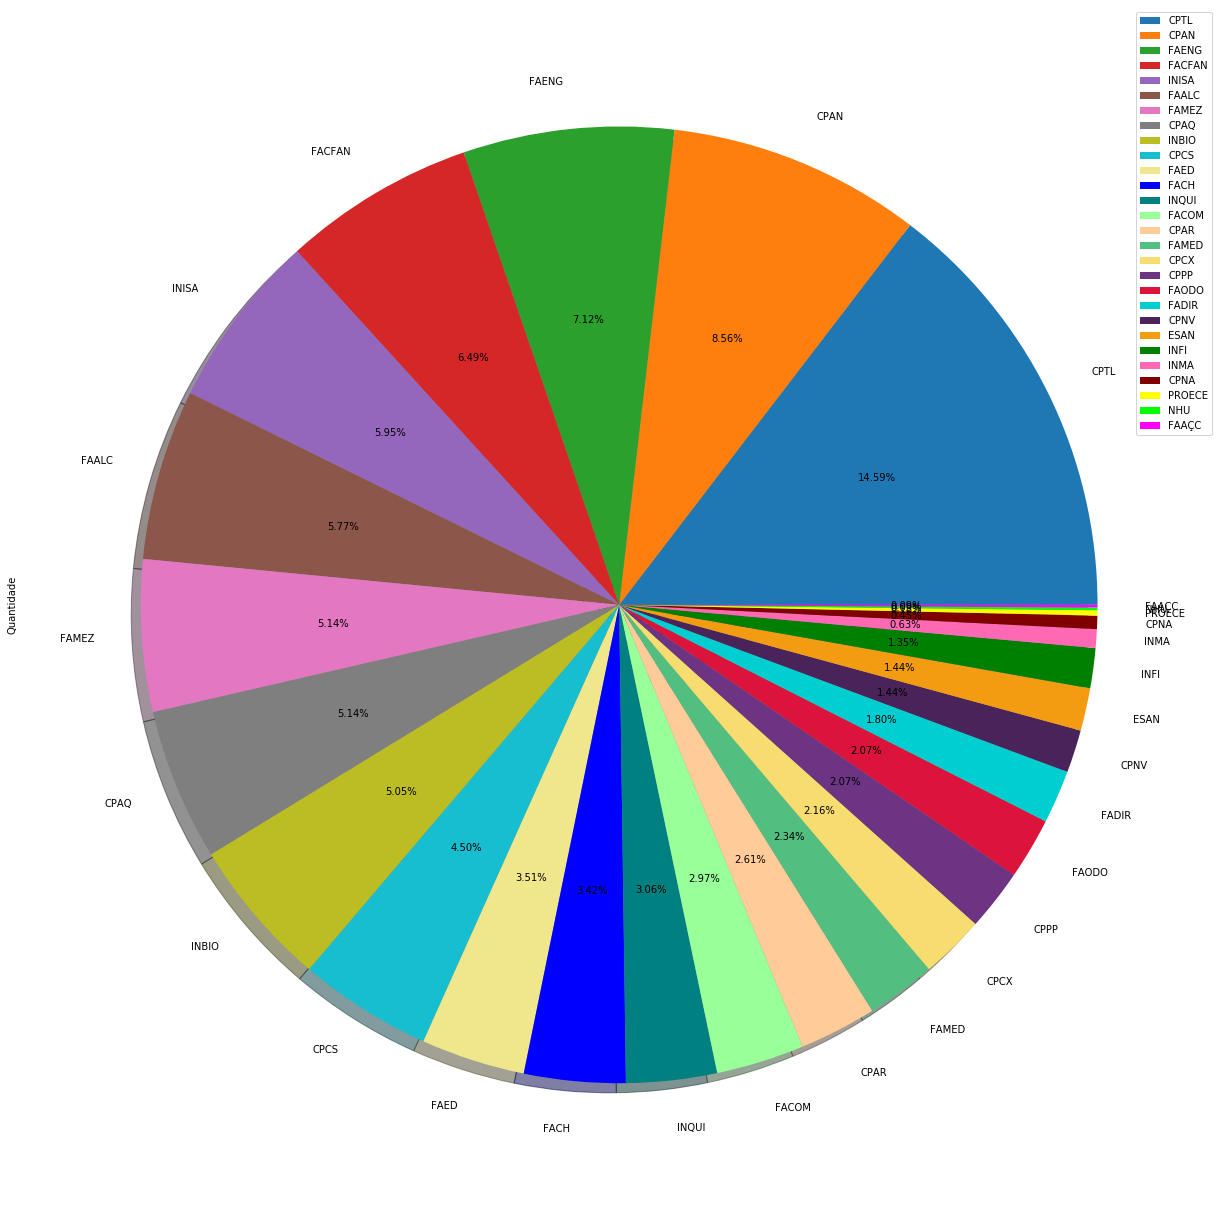

In [480]:
unidade_pie = trabalhos_submetidos.plot.pie(y='Quantidade',figsize=(22, 22), shadow=True, autopct='%1.2f%%', colors=colors)

In [481]:
unidade_pie_fig = unidade_pie.get_figure().savefig('../Resultados/img/unidade_pie_2019.pdf')

In [482]:
unidade_pie_fig

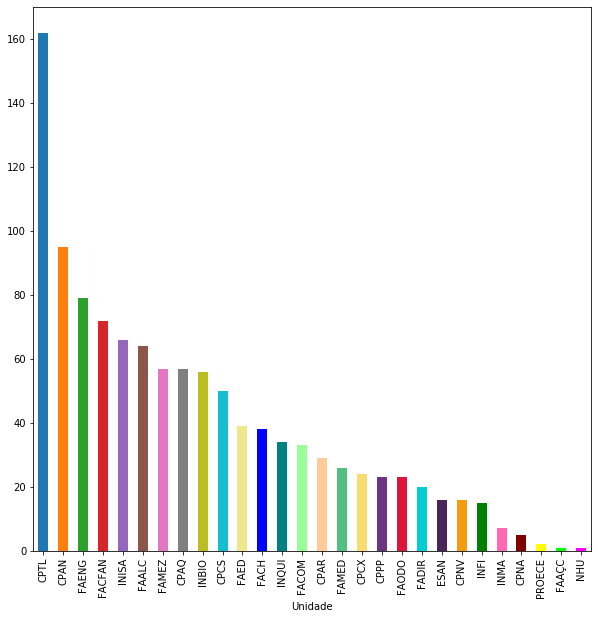

In [483]:
# ax = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
# unidade_bar = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', kind='bar', ax=ax)
unidade_bar = qtd_unidade.plot.bar(y='Quantidade',figsize=(10,10), legend=False,color = colors)

In [484]:
for p in unidade_bar.patches: unidade_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [485]:
unidade_bar_fig = unidade_bar.get_figure().savefig('../Resultados/img/unidade_bar_2019.pdf')

In [486]:
#unidade_bar.get_figure()

# **Quantidade por programa**

In [487]:
ordenado = df.groupby(['Programa']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Programa','Estudante']].reset_index().drop('index',axis=1)

In [488]:
qtd_programa = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [489]:
qtd_programa

,Quantidade
Programa,
PIBIC,463
PIVIC,200
ENEX,114
PPG,84
PAEXT,71
PET,55
PIBID,39
RP,23
PEG,17


In [490]:
#qtd_programa.to_excel('docs/qtd_programa.xlsx')

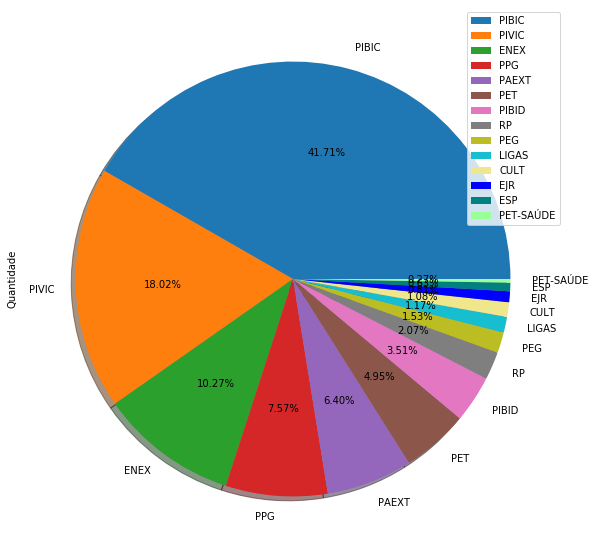

In [491]:
programa_pie = qtd_programa.plot.pie(y='Quantidade',figsize=(10, 10), shadow=True, autopct='%1.2f%%', colors=colors).legend(loc='upper right')

In [492]:
programa_pie_fig = programa_pie.get_figure()

In [493]:
programa_pie_fig.savefig('../Resultados/img/programa_pie_2019.pdf')

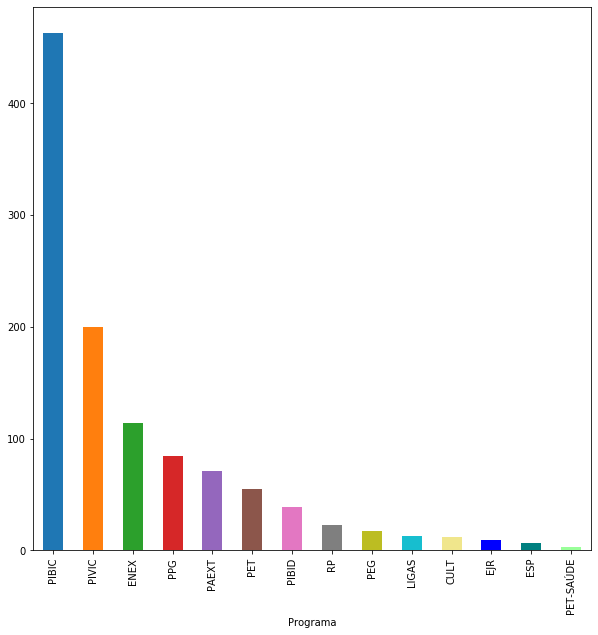

In [494]:
#ax = qtd_programa.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
programa_bar = qtd_programa.plot.bar(y='Quantidade',figsize=(10,10), legend=False, color=colors)

In [495]:
for p in programa_bar.patches: programa_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [496]:
programa_bar_fig = programa_bar.get_figure()

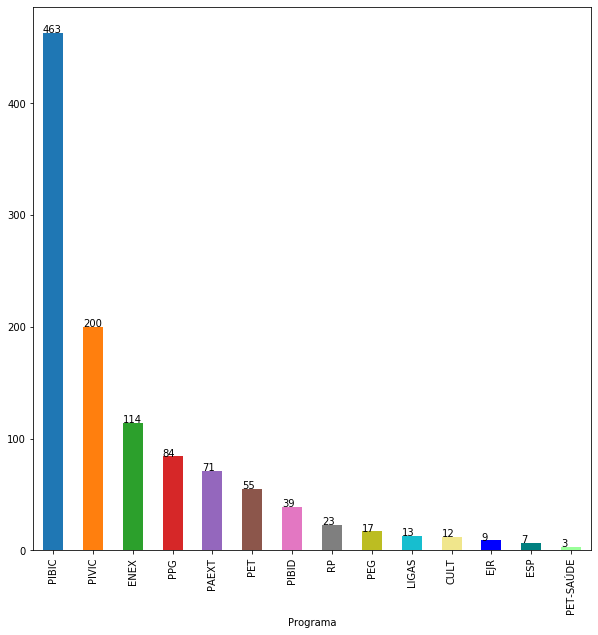

In [497]:
programa_bar_fig

In [498]:
programa_bar_fig.savefig('../Resultados/img/programa_bar_2019.pdf')

# **Quantidade de apresentacoes que cada programa lançou em cada unidade**

In [499]:
ordenado_unidade = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Unidade',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [500]:
qtd_proguni_unid = ordenado_unidade.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [501]:
#qtd_proguni_unid.loc['CPPP']['Quantidade'].sum()

In [502]:
#qtd_proguni_unid.loc['CPPP'][['Programa','Quantidade']]

In [503]:
qtd_proguni_unid

,Programa,Quantidade
Unidade,,
CPAN,CULT,2
CPAN,PAEXT,4
CPAN,PEG,2
CPAN,PET,4
CPAN,ENEX,16
CPAN,PIBIC,22
CPAN,PIBID,7
CPAN,PIVIC,7
CPAN,ESP,3


In [504]:
qtd_proguni_unid.to_excel('../Resultados/docs/qtd_proguni_unid_2019.xlsx')

In [505]:
ordenado_prog = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Programa',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [506]:
qtd_proguni_prog = ordenado_prog.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [507]:
#qtd_proguni_prog.loc['CPPP']['Quantidade'].sum()

In [508]:
#qtd_proguni_prog.loc['CPPP'][['Programa','Quantidade']]

In [509]:
qtd_proguni_prog

,Unidade,Quantidade
Programa,,
CULT,CPAN,2
CULT,CPAQ,1
CULT,CPAR,2
CULT,CPNA,1
CULT,CPTL,1
CULT,FAALC,4
CULT,FAED,1
EJR,FAMEZ,1
EJR,FAENG,2


In [510]:
qtd_proguni_prog.to_excel('../Resultados/docs/qtd_proguni_prog_2019.xlsx')

In [511]:
dfs = {'Ordenado por Unidade':qtd_proguni_unid, 'Ordenado por Programa':qtd_proguni_prog}

In [512]:
dfs

{'Ordenado por Unidade':         Programa  Quantidade
 Unidade                     
 CPAN        CULT           2
 CPAN       PAEXT           4
 CPAN         PEG           2
 CPAN         PET           4
 CPAN        ENEX          16
 CPAN       PIBIC          22
 CPAN       PIBID           7
 CPAN       PIVIC           7
 CPAN         ESP           3
 CPAN          RP           6
 CPAN         EJR           1
 CPAN         PPG          21
 CPAQ          RP           5
 CPAQ        CULT           1
 CPAQ       PAEXT           7
 CPAQ         PEG           1
 CPAQ       PIBIC          19
 CPAQ       PIVIC          15
 CPAQ       PIBID           8
 CPAQ        ENEX           1
 CPAR       PIVIC           2
 CPAR         PPG           1
 CPAR         PEG           3
 CPAR       LIGAS           1
 CPAR       PIBIC           8
 CPAR       PAEXT           2
 CPAR       PIBID           1
 CPAR          RP           1
 CPAR        CULT           2
 CPAR        ENEX           8
 ...          ..

In [513]:
writer = pd.ExcelWriter('../Resultados/docs/prog_unid_2019.xlsx', engine='xlsxwriter')
for sheet_name in dfs.keys(): dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=True)
writer.save()

# **Alunos que submeteram mais de um trabalho**

In [514]:
x = df.groupby(['Estudante','Unidade']).count().reset_index()[['Estudante','Unidade','Data da apresentação']].reset_index().sort_values(by='Estudante',ascending=True).drop('index',axis=1)

In [515]:
estudante = x.rename(columns={'Data da apresentação':'Quantidade'})

In [516]:
aluno_excel = estudante[estudante['Quantidade']>1].reset_index().drop('index',axis=1)

In [517]:
aluno_excel

,Estudante,Unidade,Quantidade
0,ABEL PEREIRA LIMA SOARES,CPCS,2
1,ALEXSANDRA NOGUEIRA MARTINS SILVA,CPCS,2
2,AMANDA ALVES REZENDE,FAMED,2
3,AMANY HATAE CAMPOVILLE,CPTL,2
4,ANA BEATRIZ SILVA BRANDÃO DE SOUZA,FAALC,2
5,BÁRBARA ARTUZO SIMABUCO,FAALC,2
6,CARLOS EDUARDO DOS SANTOS NASCIMENTO,INISA,2
7,DANIELLE DOS SANTOS BARRETO,FAED,2
8,EDER DE ARRUDA INSAURALDE,CPAQ,2
9,FERNANDO RIBEIRO DOS SANTOS,CPTL,2


In [518]:
aluno_excel.to_excel('../Resultados/docs/qtd_aluno_2019.xlsx',index=False)

# **Quantidade de apresentacoes em cada dia**

In [519]:
#x = df.groupby(['Data da apresentação']).count().reset_index()[['Data da apresentação','Estudante']].reset_index().sort_values(by='Data da apresentação',ascending=True).drop('index',axis=1)

In [520]:
#apresentacao = x.rename(columns={'Estudante':'Quantidade'}).set_index('Data da apresentação')

In [521]:
#apresentacao

In [522]:
#apresentacao_pie = apresentacao.plot.pie(y='Quantidade',figsize=(10, 10), shadow=True, autopct='%1.2f%%',colors=colors)

In [523]:
#apresentacao_pie_bar = apresentacao_pie.get_figure()

In [524]:
#apresentacao_pie_bar.savefig('../Resultados/img/apresentacao_pie_2019.pdf')

In [525]:
#'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'
#apresentacao_bar = apresentacao.plot(color='m',figsize=(10,10), kind='bar', legend=False)
#apresentacao_bar = apresentacao.plot.bar(y='Quantidade',figsize=(10,10), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], legend=False)

In [526]:
#for p in apresentacao_bar.patches: apresentacao_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [527]:
#apresentacao_bar_fig = apresentacao_bar.get_figure()

In [528]:
#apresentacao_bar_fig

In [529]:
#apresentacao_bar_fig.savefig('../Resultados/img/apresentacao_bar_2019.pdf')

# **Submissoes do PET por Campus**

In [530]:
x = df.groupby(['Programa','Unidade']).count().reset_index()[['Programa','Unidade','Estudante']].reset_index().sort_values(by='index',ascending=True).drop('index',axis=1)

In [531]:
pet = x.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [532]:
pets = pet.loc[['PET']]

In [533]:
pets = pets.sort_values('Quantidade', ascending=False)

In [534]:
pets = pets.set_index('Unidade')

In [535]:
pets

,Quantidade
Unidade,
CPTL,17
CPCS,6
CPPP,6
FACOM,6
CPAN,4
FAENG,4
FAMEZ,4
FACFAN,3
INFI,2


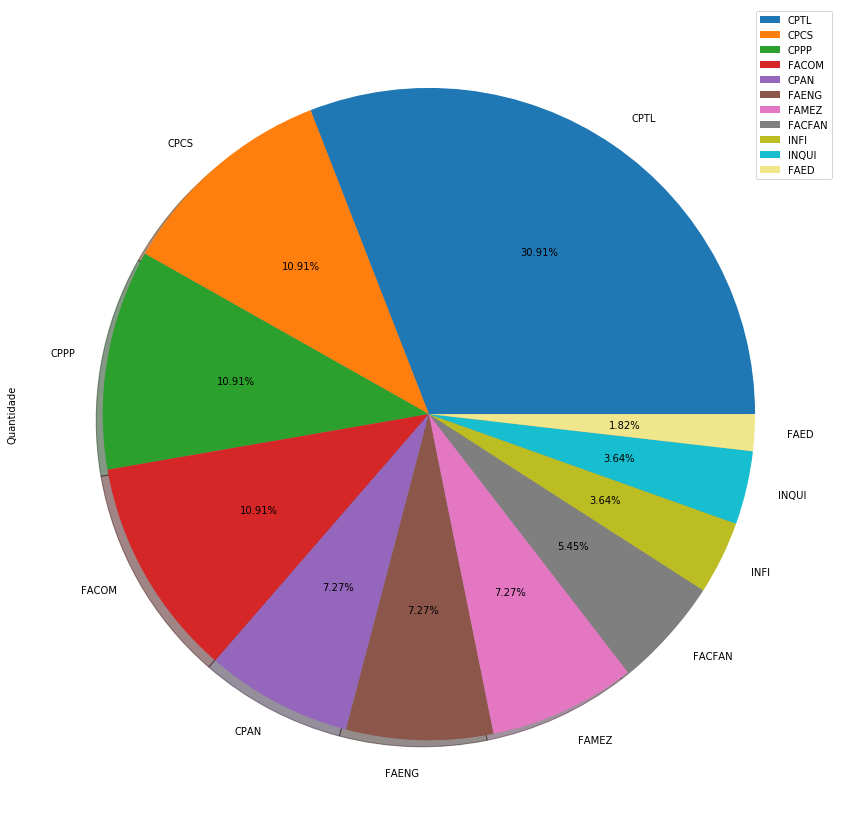

In [536]:
pets_pie = pets.plot.pie(y='Quantidade',figsize=(15, 15), shadow=True, autopct='%1.2f%%', colors=colors)

In [537]:
pets_pie.get_figure().savefig('../Resultados/img/pets_pie_2019.pdf')

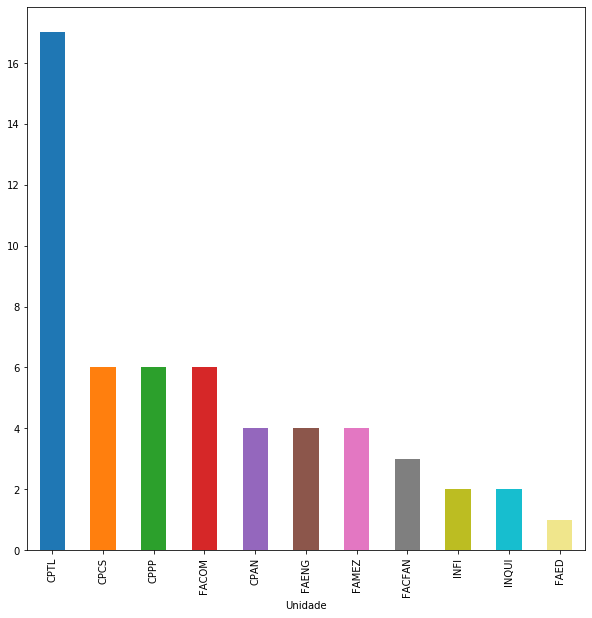

In [538]:
pets_bar = pets.plot.bar(y='Quantidade',figsize=(10, 10), color=colors, legend=False)

In [539]:
for p in pets_bar.patches: pets_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [540]:
pets_bar.get_figure().savefig('../Resultados/img/pets_bar_2019.pdf')

# **PORCENTAGEM RELACIONADA A QTD DE ALUNOS ATIVOS POR CAMPUS**

In [541]:
df_all = pd.read_excel('../Dados/generated/Alunos-Matriculados.xlsx')

In [542]:
df_all['unidade'].value_counts().keys()

Index(['CPTL', 'FAENG', 'CPAN', 'CPAQ', 'ESAN', 'FACOM', 'FAALC', 'FAED',
       'FACH', 'FADIR', 'CPNA', 'FACFAN', 'FAMEZ', 'CPAR', 'CPCS', 'INBIO',
       'CPPP', 'CPCX', 'CPNV', 'FAMED', 'INISA', 'INQUI', 'FAODO', 'INFI',
       'INMA'],
      dtype='object')

In [543]:
df_all['unidade'].value_counts()

CPTL      3028
FAENG     2035
CPAN      2029
CPAQ      1425
ESAN      1392
FACOM     1290
FAALC      936
FAED       886
FACH       880
FADIR      605
CPNA       546
FACFAN     527
FAMEZ      517
CPAR       497
CPCS       492
INBIO      476
CPPP       469
CPCX       467
CPNV       450
FAMED      444
INISA      433
INQUI      319
FAODO      276
INFI       213
INMA       205
Name: unidade, dtype: int64

### **CRIA UM DATAFRAME COM AS CHAVES DO DICT, E COM OS VALUES DE CADA UNIDADE**

In [544]:
alunos = pd.DataFrame(df_all['unidade'].value_counts()).rename(columns={'unidade':'Quantidade'})

In [545]:
alunos

,Quantidade
CPTL,3028
FAENG,2035
CPAN,2029
CPAQ,1425
ESAN,1392
FACOM,1290
FAALC,936
FAED,886
FACH,880
FADIR,605


In [546]:
trabalhos_submetidos

,Quantidade
CPTL,162
CPAN,95
FAENG,79
FACFAN,72
INISA,66
FAALC,64
FAMEZ,57
CPAQ,57
INBIO,56
CPCS,50


In [547]:
porcentagem = (trabalhos_submetidos/alunos).dropna()

In [548]:
porcentagem.columns

Index(['Quantidade'], dtype='object')

In [549]:
porcentagem.sort_values(by=['Quantidade'],ascending=False,inplace=True)

In [550]:
porcentagem

,Quantidade
INISA,0.152425
FACFAN,0.136622
INBIO,0.117647
FAMEZ,0.110251
INQUI,0.106583
CPCS,0.101626
FAODO,0.083333
INFI,0.070423
FAALC,0.068376
FAMED,0.058559


**COMO O PANDAS CALCULA A PORCENTAGEM**

Ele pega a soma total das colunas e considera essa soma sendo 100%, e cada tupla sendo x, dai ele
faz a regra de 3 e obtem o valor

1.579963 - 100%

0.15242494226327943 - x

1.579963x = 15.242494226327944

x = 15.242494226327944/1.579963

9.64737416403292


x = (0.15242494226327943*100)/1.579963

x = 9.64737416403292

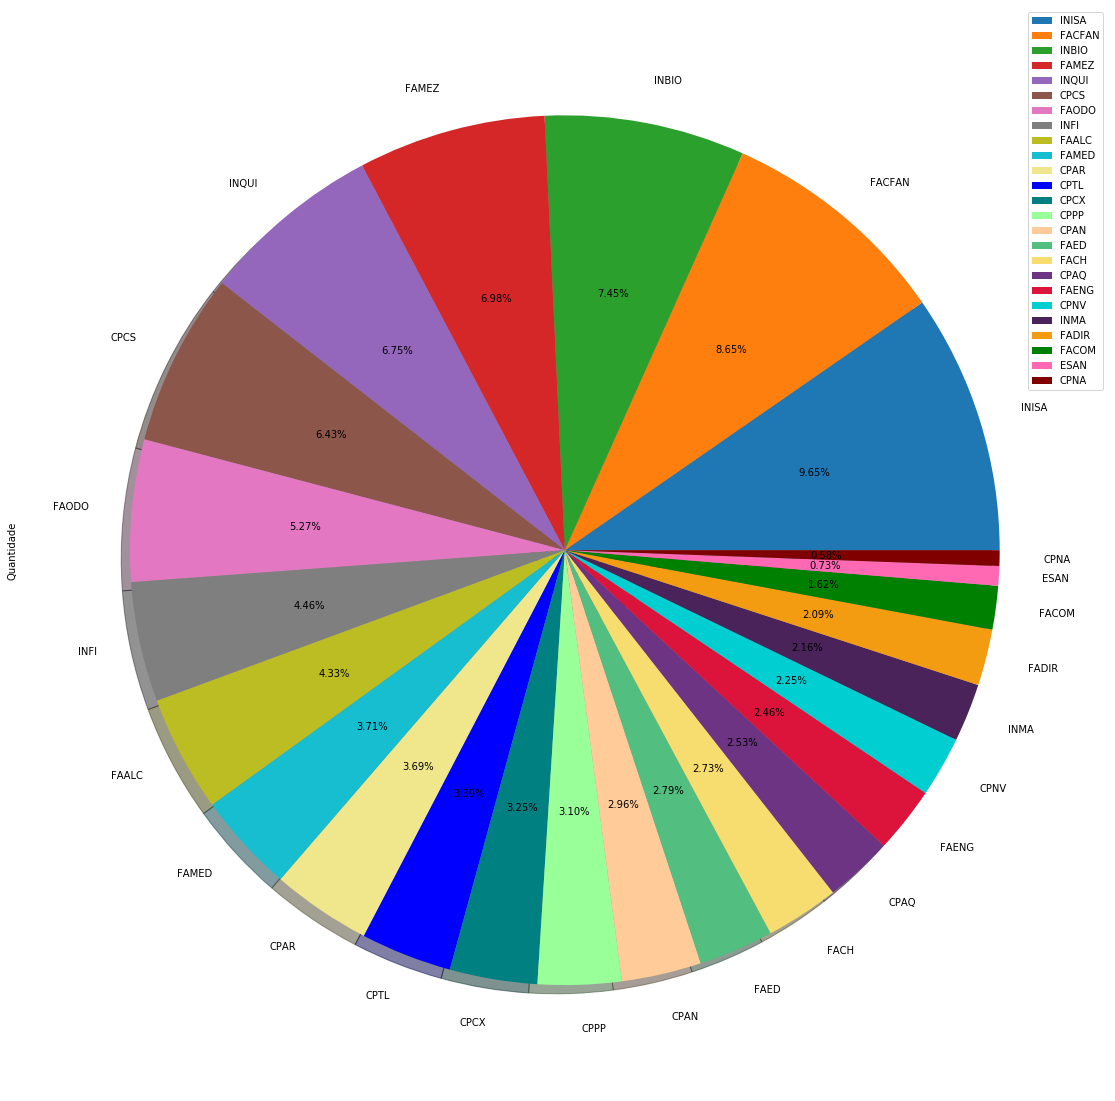

In [551]:
porcentagem_fig = porcentagem.plot.pie(subplots=True,figsize=(20, 20), shadow=True, autopct='%1.2f%%', colors=colors)

In [552]:
porcentagem_fig[0].get_figure().savefig('../Resultados/img/porcentagem_2019.pdf')